Mount google drive

In [2]:
# !pip install google.colab

     |████████████████████████████████| 72 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 104 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 758 kB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 67.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 484 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 71.9 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 133 kB 72.1 MB/s eta 0:00:01


  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102292 sha256=e2049c22f8ae90fa809330a99a802a198d43a43b05d85c030e69c637d2a6b32d
  Stored in directory: /home/ubuntu/.cache/pip/wheels/a8/c1/f9/565bc1832dda03cc21db8c8751487357f616112b6113bbf9bb
  ERROR: Command errored out with exit status 1:
   command: /home/ubuntu/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-wsu9v18l/pandas_bc984b3de1ee4047b183187604a95aba/setup.py'"'"'; __file__='"'"'/tmp/pip-install-wsu9v18l/pandas_bc984b3de1ee4047b183187604a95aba/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-j498_5gv
       cwd: /tmp/pip-install-wsu9v18l/pandas_bc984b3de1ee4047b183187604a95aba/
  Co

  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13384 sha256=60b7ffd1fcd342da9f28686239148bf96d93ab8db3ad81d5905b11c5d36aa52c
  Stored in directory: /home/ubuntu/.cache/pip/wheels/79/f4/2b/306dbe0f6b429a1ccb56aef907984a2f21bd6cb7f702b65d05
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5078 sha256=f767be0789d59f6d867320589a3111e3700e7e6b07c0bfc09dded36092ae7d47
  Stored in directory: /home/ubuntu/.cache/pip/wheels/a7/bd/0d/d95b629ee4a7368830202858e45ac76cd837a42cafa50da81e
  Created wheel for tornado: filename=tornado-4.5.3-cp39-cp39-linux_x86_64.whl size=420784 sha256=d9d3ea7343200e24966beb926628fdfa9fa216eb7b2fbb203f7933fcc054054b
  Stored in directory: /home/ubuntu/.cache/pip/wheels/83/38/94/6e1e08dd9ed83e2fc92914d24bf950c39e622dfbb12bf753d8
Successfully built google.colab portpicker simplegeneric tornado
Failed to build pandas
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalli

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

In [5]:
# change dir to CC's folder
# %cd "/content/drive/MyDrive/CC"

/content/drive/MyDrive/CC


In [6]:
# !nvidia-smi

Thu Oct 13 00:11:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# CC's LSTM for stock prediction

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TerminateOnNaN, CSVLogger
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
%matplotlib inline

2022-11-10 13:22:54.551664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 13:22:54.731452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 13:22:54.731477: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 13:22:54.767319: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 13:22:55.612381: W tensorflow/stream_executor/platform/de

## Hyper parameters

In [5]:
# for dataset splitting
TRAIN_RATIO = 8
VALIDATION_RATIO = 1
TEST_RATIO = 1

# Using previous 21 days data to predict next 7 days close price
## time window size
TIME_WINDOW_SIZE = 21
## feature size
NFEATURES = 40
## forescast size
FORECAST_SIZE = 7

# Model related parameters
BATCH_SIZE = 4 # for LSTM, don't use large batch_size
EPOCH = 50

# Train related parameters
MODEL_SAVED_PATH = "./saved_model/exp_1/"
init_epoch = 0

## Load dataset from csv and split train, validation and test dataset (8:1:1)

In [6]:
dataset_df = pd.read_csv("./data/dataset.csv")
# dataset_df

In [7]:
# transfer pandas dataframe to numpy ndarray
dataset_np = np.array(dataset_df.iloc[:, 1:])
dataset_np.shape

(2517, 40)

In [8]:
# split train, validation and test
dataset_size = dataset_np.shape[0]
dataset_segment = dataset_size // 10
train_dataset = dataset_np[:TRAIN_RATIO * dataset_segment]
validation_dataset = dataset_np[TRAIN_RATIO * dataset_segment: (TRAIN_RATIO + VALIDATION_RATIO) * dataset_segment]
test_dataset = dataset_np[(TRAIN_RATIO + VALIDATION_RATIO) * dataset_segment:]

train_dataset.shape, validation_dataset.shape, test_dataset.shape

((2008, 40), (251, 40), (258, 40))

## Define data normalization function

In [9]:
def normalize_by_column_within_time_window(x, y):
  # x.shape = (window_size, 40)
  # y.shape = (forecast_size)
  EPS = 1e-5
  ret_x = np.array(x)
  ret_y = np.array(y)

  train_close_price_min = np.min(ret_x[:, 3]) # the 3th column of x is the close price
  train_close_price_max = np.max(ret_x[:, 3])

  for i in range(ret_x.shape[1]):
    column_min = np.min(ret_x[:, i])
    column_max = np.max(ret_x[:, i])
    ret_x[:, i] = (ret_x[:, i] - column_min) / (column_max - column_min + EPS)  # EPS for value stability (x / 0.000000000000000001 will be huge)

  
  ret_y = (ret_y - train_close_price_min) / (train_close_price_max - train_close_price_min + EPS)
  
  return ret_x, ret_y

In [59]:
# # fix every column into [0, 1)
# train_data_norm = normalize_by_column(train_dataset)
# validation_dataset_norm = normalize_by_column(validation_dataset)
# test_dataset_norm = normalize_by_column(test_dataset)

In [60]:
# np.min(train_data_norm[:, 0]), np.max(train_data_norm[:, 0])

## Define Kears data generator (keras.utils.Sequence)

In [10]:
class DataGenerator(tf.keras.utils.Sequence):

  def __init__(self, dataset, batch_size, window_size, forecast_size, shuffle=False):
    self.dataset = dataset  # shape = (n, features)
    self.batch_size = batch_size
    self.window_size = window_size
    self.forecast_size = forecast_size

    self.x = []             # final x.shape = (-1, window_size, features)
    self.y = []             # final y.shape = (-1, forecast_size)
    for i in range(self.dataset.shape[0] - window_size - forecast_size):
      # cur_x: dataset[i: i + window_size], shape = (window_size, nfeatures)
      # cur_y: dataset[i + window_size: i + window_size + forecast_size, 3], shape = shape = (window_size, 1)
      # normalize_by_column_within_time_window fix x and y to around [0, 1]
      cur_x, cur_y = normalize_by_column_within_time_window(dataset[i: i + window_size, :], dataset[i + window_size: i + window_size + forecast_size, 3].reshape(-1, forecast_size))

      # cur_x = dataset[i: i + window_size, :]
      # cur_y = dataset[i + window_size: i + window_size + forecast_size, 3]

      self.x.append(cur_x)
      self.y.append(cur_y)
      
    self.x = np.array(self.x)
    self.y = np.array(self.y).reshape(-1, forecast_size)
    
    if shuffle:
      shuffle_idx = np.random.permutation(self.x.shape[0])
      self.x = self.x[shuffle_idx, :, :]
      self.y = self.y[shuffle_idx, :]

  def __len__(self):
    return self.x.shape[0] // self.batch_size

  def __getitem__(self, idx):
    # return one batch data 
    # x: (batch_size, window_size, features)
    # y: (batch_size, forecast_size, 1)
    batch_x = self.x[idx * self.batch_size: (idx + 1) * self.batch_size]
    batch_y = self.y[idx * self.batch_size: (idx + 1) * self.batch_size]

    return batch_x, batch_y

In [11]:
train_gen = DataGenerator(dataset=train_dataset, batch_size=BATCH_SIZE, window_size=TIME_WINDOW_SIZE, forecast_size=FORECAST_SIZE, shuffle=True)
valid_gen = DataGenerator(dataset=validation_dataset, batch_size=BATCH_SIZE, window_size=TIME_WINDOW_SIZE, forecast_size=FORECAST_SIZE, shuffle=False)
test_gen = DataGenerator(dataset=test_dataset, batch_size=BATCH_SIZE, window_size=TIME_WINDOW_SIZE, forecast_size=FORECAST_SIZE, shuffle=False)

In [12]:
train_batch_x, train_batch_y = train_gen[0]
train_batch_x.shape, train_batch_y.shape
# should be (batch, window_size, nfeatures) and (batch, forecast_size)

((4, 21, 40), (4, 7))

In [13]:
train_batch_y[0]

array([0.88188586, 1.10326266, 0.67930105, 0.71175095, 0.828627  ,
       0.7436057 , 0.62494208])

## Define sequential model and train related stuff

In [14]:
class LSTMPredictor(keras.Model):

  def __init__(self, input_shape, forecast_size): 
    # input shape should be (batch, window_size, features)
    super().__init__()

    self.lstm1 = keras.layers.LSTM(10, activation="sigmoid", input_shape=input_shape, return_sequences=True)  # (batch, window_size, 10)
    self.dropout1 = keras.layers.Dropout(0.1)

    self.lstm2 = keras.layers.LSTM(32, activation="sigmoid", return_sequences=True) # (batch, window_size, 32)
    self.dropout2 = keras.layers.Dropout(0.1)

    self.lstm3 = keras.layers.LSTM(64, activation="sigmoid", return_sequences=True) # (batch, window_size, 64)
    self.dropout3 = keras.layers.Dropout(0.1)

    self.lstm4 = keras.layers.LSTM(32, activation="sigmoid", return_sequences=True) # (batch, window_size, 32)
    self.dropout4 = keras.layers.Dropout(0.1)

    self.lstm5 = keras.layers.LSTM(forecast_size, activation="relu", return_sequences=False) # (batch, forecast_size)
    self.dense5 = keras.layers.Dense(forecast_size) # (batch, forecast_size)
  
  def call(self, inputs):
    x = self.lstm1(inputs)
    x = self.dropout1(x)
    x = self.lstm2(x)
    x = self.dropout2(x)
    x = self.lstm3(x)
    x = self.dropout3(x)
    x = self.lstm4(x)
    x = self.dropout4(x)

    x = self.lstm5(x)
    x = self.dense5(x)
    return x

In [15]:
model = LSTMPredictor(input_shape=(-1, TIME_WINDOW_SIZE, NFEATURES), forecast_size=FORECAST_SIZE)

# optimizer
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

model.compile(optimizer=adam, loss="mse", metrics=["mape"])
model.build(input_shape=(BATCH_SIZE, TIME_WINDOW_SIZE, NFEATURES))
model.summary()

2022-11-10 13:37:32.648644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 13:37:32.648682: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 13:37:32.648706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-24-249): /proc/driver/nvidia/version does not exist
2022-11-10 13:37:32.648933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ubuntu/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning:

Model: "lstm_predictor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 multiple                  2040      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 lstm_1 (LSTM)               multiple                  5504      
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 lstm_2 (LSTM)               multiple                  24832     
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 lstm_3 (LSTM)               multiple               

In [16]:
# TODO: Set the filepath under which you want to save the model.
model_checkpoint = ModelCheckpoint(filepath=MODEL_SAVED_PATH + 'LSTM_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='auto',
                                   period=1)

csv_logger = CSVLogger(filename=MODEL_SAVED_PATH + 'LSTM_training_log.csv',
                       separator=',',
                       append=True)

def lr_schedule(epoch):
    if epoch < 20:
        return 0.001
    elif epoch < 40:
        return 0.0001
    else:
        return 0.00001

learning_rate_scheduler = LearningRateScheduler(schedule=lr_schedule,
                                                verbose=1)

terminate_on_nan = TerminateOnNaN()

callbacks = [model_checkpoint,
             csv_logger,
             learning_rate_scheduler,
             terminate_on_nan]

## Train

In [18]:
!ls

Dataset1.ipynb	Prophet.ipynb		       cc_msc.ipynb
Dataset2.ipynb	SentimentAnalysis.ipynb        data
Dataset3.ipynb	StockHistoricalData	       open_sourced_github_projs
Figures		TechnicalIndicator.ipynb       raw_analyst_ratings.csv
LSTM.ipynb	Untitled.ipynb		       readme.md
MACD.csv	Untitled1.ipynb		       us_equities_news_dataset.csv
MACD_fig.png	analyst_ratings_processed.csv


In [19]:
history = model.fit(train_gen, 
                    epochs=EPOCH,
                    validation_data=valid_gen,
                    callbacks=callbacks,
                    initial_epoch=init_epoch);


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
495/495 [==============================] - ETA: 0s - loss: 0.3219 - mape: 42367.7969
Epoch 1: val_loss improved from 0.31064 to 0.23441, saving model to ./saved_model/exp_1/LSTM_epoch-01_loss-0.3219_val_loss-0.2344.h5
495/495 [==============================] - 17s 34ms/step - loss: 0.3219 - mape: 42367.7969 - val_loss: 0.2344 - val_mape: 150.4376 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
495/495 [==============================] - ETA: 0s - loss: 0.2568 - mape: 26343.4961
Epoch 2: val_loss improved from 0.23441 to 0.21028, saving model to ./saved_model/exp_1/LSTM_epoch-02_loss-0.2568_val_loss-0.2103.h5
495/495 [==============================] - 17s 34ms/step - loss: 0.2568 - mape: 26343.4961 - val_loss: 0.2103 - val_mape: 102.5553 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
495/495 [==============================] - ETA: 0s 

Epoch 23/50
495/495 [==============================] - ETA: 0s - loss: 0.2054 - mape: 6049.7295
Epoch 23: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2054 - mape: 6049.7295 - val_loss: 0.1862 - val_mape: 102.4941 - lr: 1.0000e-04

Epoch 24: LearningRateScheduler setting learning rate to 0.0001.
Epoch 24/50
495/495 [==============================] - ETA: 0s - loss: 0.2077 - mape: 5363.8130
Epoch 24: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2077 - mape: 5363.8130 - val_loss: 0.1858 - val_mape: 102.1160 - lr: 1.0000e-04

Epoch 25: LearningRateScheduler setting learning rate to 0.0001.
Epoch 25/50
495/495 [==============================] - ETA: 0s - loss: 0.2048 - mape: 210.5447
Epoch 25: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2048 - mape: 210.5447 - val_loss: 0.1853 - val_mape: 97.8071 - lr: 1.0000e-0

Epoch 46/50
495/495 [==============================] - ETA: 0s - loss: 0.2065 - mape: 2524.9880
Epoch 46: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2065 - mape: 2524.9880 - val_loss: 0.1855 - val_mape: 102.2696 - lr: 1.0000e-05

Epoch 47: LearningRateScheduler setting learning rate to 1e-05.
Epoch 47/50
495/495 [==============================] - ETA: 0s - loss: 0.2028 - mape: 4510.5063
Epoch 47: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2028 - mape: 4510.5063 - val_loss: 0.1856 - val_mape: 102.5579 - lr: 1.0000e-05

Epoch 48: LearningRateScheduler setting learning rate to 1e-05.
Epoch 48/50
495/495 [==============================] - ETA: 0s - loss: 0.2041 - mape: 3406.7222
Epoch 48: val_loss did not improve from 0.18429
495/495 [==============================] - 17s 34ms/step - loss: 0.2041 - mape: 3406.7222 - val_loss: 0.1856 - val_mape: 102.6423 - lr: 1.0000e-

## Inference

In [20]:
# load model
model_name = "LSTM_epoch-10_loss-0.2214_val_loss-0.1843.h5"
weight_path = os.path.join(MODEL_SAVED_PATH, model_name)
pred_model = LSTMPredictor(input_shape=(-1, TIME_WINDOW_SIZE, NFEATURES), forecast_size=FORECAST_SIZE)
pred_model.build(input_shape=(BATCH_SIZE, TIME_WINDOW_SIZE, NFEATURES))

pred_model.load_weights(weight_path)

In [21]:
def inference(model, test_data):
  # test_data should be (window_size, 40)
  EPS = 1e-5
  close_price_min = np.min(test_data[:, 3]) # the 3th column of x is the close price
  close_price_max = np.max(test_data[:, 3]) # the 3th column of x is the close price
  for i in range(test_data.shape[1]):
    column_min = np.min(test_data[:, i])
    column_max = np.max(test_data[:, i])
    test_data[:, i] = (test_data[:, i] - column_min) / (column_max - column_min + EPS)

  y_pred = model.predict(test_data.reshape(1, test_data.shape[0], test_data.shape[1]))
  print(y_pred.shape)
  y_pred = y_pred * (close_price_max - close_price_min + EPS) + close_price_min
  return y_pred.reshape(-1)

In [22]:
test_x, test_y = test_gen[0]
test_x.shape, test_y.shape

((4, 21, 40), (4, 7))

In [23]:
def draw_inference(model, test_data, test_label):
  y_pred = inference(model, test_data)
  y_history = test_data[:, 3] # the 3th cloumn is the close price
  x_idxs = np.arange(test_data.shape[0] + test_label.shape[0], dtype=np.int32)

  plt.scatter(x_idxs[:test_data.shape[0]], y_history, marker="*")
  plt.plot(x_idxs[:test_data.shape[0]], y_history)

  plt.scatter(x_idxs[test_data.shape[0]: ], test_label, marker="D")
  plt.plot(x_idxs[test_data.shape[0]: ], test_label)

  plt.scatter(x_idxs[test_data.shape[0]: ], y_pred, marker="+")
  plt.plot(x_idxs[test_data.shape[0]: ], y_pred)

1/1 [==============================] - 1s 725ms/step
(1, 7)


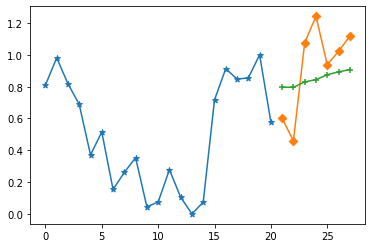

In [24]:
draw_inference(pred_model, test_x[2], test_y[2])